In [5]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf


with open("Data/cars.csv") as file:
    cars = pd.read_csv(file)

cars.dropna(inplace=True)


In [6]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
cars["model_year"].value_counts(sort=False)

70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: model_year, dtype: int64

In [8]:
cars["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [9]:
cars["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

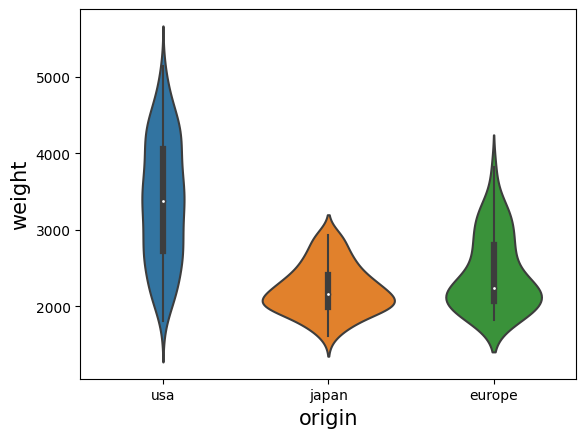

In [10]:
fig = sns.violinplot(data = cars, x="origin", y="weight", )
fig.set_ylabel("weight", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_weight.png")

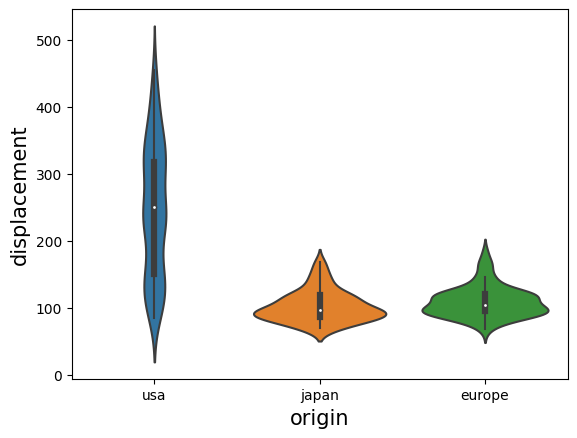

In [11]:
fig = sns.violinplot(data = cars, x="origin", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_displacement.png")

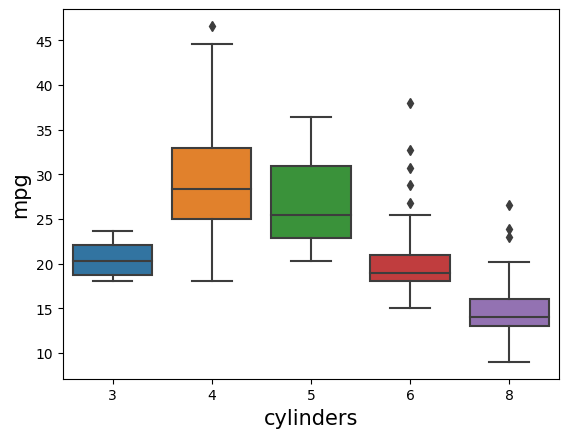

In [12]:
fig = sns.boxplot(data = cars, x="cylinders", y="mpg", )
fig.set_ylabel("mpg", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_mpg.png")

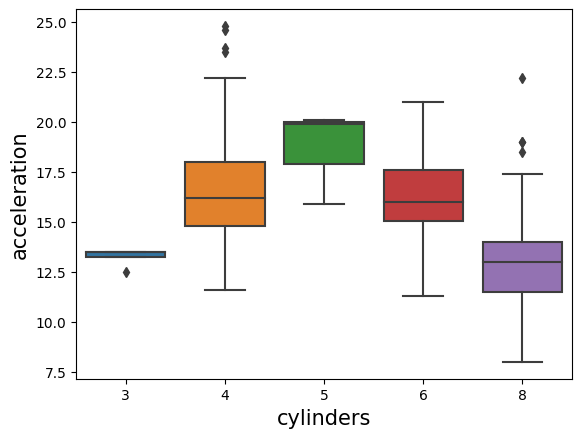

In [13]:
fig = sns.boxplot(data = cars, x="cylinders", y="acceleration", )
fig.set_ylabel("acceleration", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_acceleration.png")

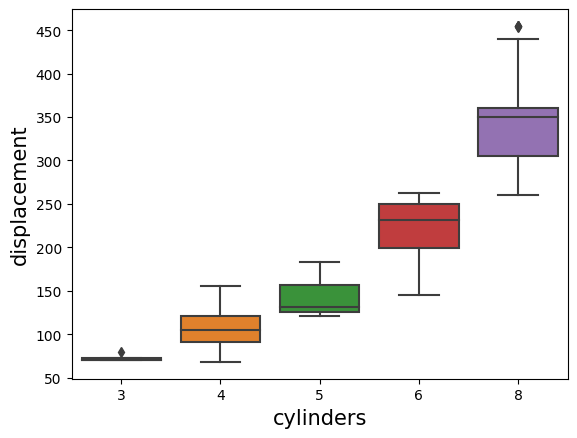

In [14]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_displacement.png")

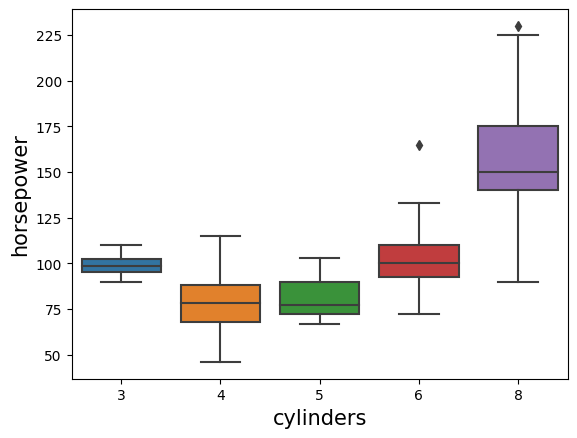

In [15]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="horsepower")
fig.set_ylabel("horsepower", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_horsepower.png")

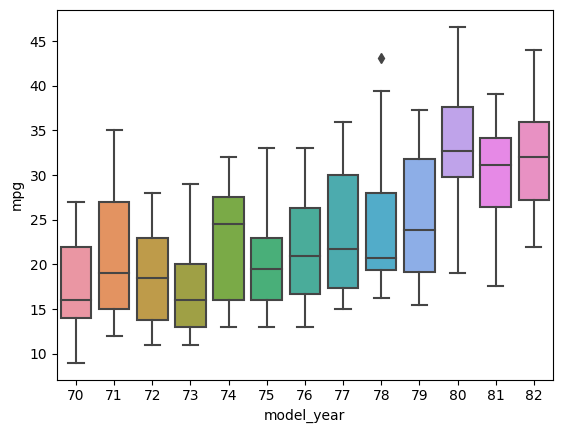

In [16]:
sns.boxplot(data = cars, x="model_year", y="mpg")
plt.savefig("images/boxplot_model_year_mpg.png")

In [17]:
results = smf.ols('mpg ~ model_year', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.08e-36
Time:                        14:50:16   Log-Likelihood:                -1280.6
No. Observations:                 392   AIC:                             2565.
Df Residuals:                     390   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.0117      6.645    -10.536      0.000     -83.076     -56.947
model_year     1.2300      0.087     14.080      0.000       1.058       1.402
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.843
Skew:                           0.387   Prob(JB):                     0.000363
Kurtosis:                       2.391   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

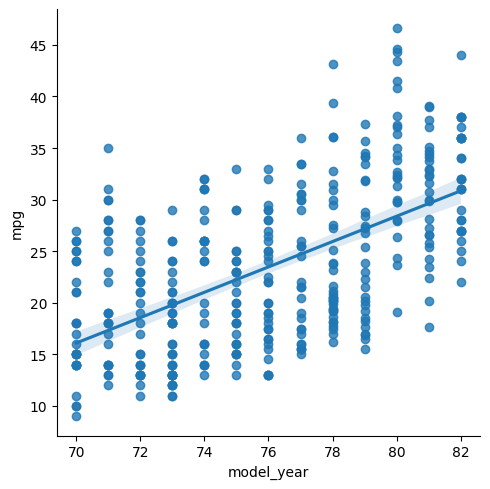

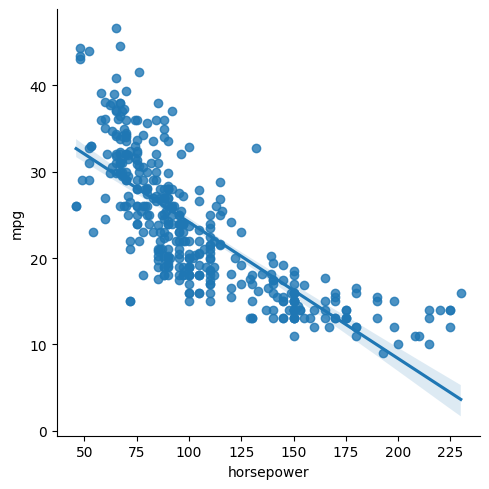

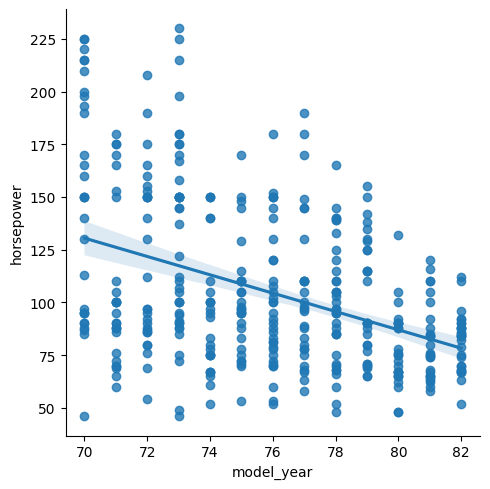

In [18]:
sns.lmplot(data=cars, x="model_year", y="mpg")
plt.savefig("images/model_year_mpg.png")
sns.lmplot(data=cars, x="horsepower", y="mpg")
plt.savefig("images/horsepower_mpg.png")
sns.lmplot(data=cars, x="model_year", y="horsepower")
plt.savefig("images/model_year_horsepower.png")

In [19]:
results = smf.ols("mpg ~ model_year + horsepower", data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.94e-98
Time:                        14:50:17   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7392      5.349     -2.382      0.018     -23.256      -2.223
model_year     0.6573      0.066      9.919      0.000       0.527       0.788
horsepower    -0.1317      0.006    -20.761      0.000      -0.144      -0.119
==============================================================================
Omnibus:                       11.834   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.068
Skew:                           0.400   Prob(JB):                      0.00240
Kurtosis:                       3.316   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""